In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 22145
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.lymodel3 import *
from utils.train import *
from typing import *
from collections import Counter
from utils.load_yelp import *
from utils.dataset import *
from utils.train import *
from utils.train import *

In [2]:
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': False,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_hidden_size': 200,
 'funsion_layers': 1,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
train_set, valid_set, test_set= load_glove_data(config)

In [4]:

batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)

In [5]:
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


({'Total': 5620005, 'Trainable': 5620005}, CrossEntropyLoss())

In [6]:
%%time
y_true, y_pred, _loss = predict(model, valid_loader, loss)
evalute(y_true, y_pred), Counter(y_pred)

CPU times: user 3.91 s, sys: 2.08 s, total: 5.99 s
Wall time: 9.69 s


((0.19932279909706546, 0.08195949886384968), Counter({3: 4241, 4: 184, 1: 5}))

In [7]:
viz = get_Visdom()
_interval = 5
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

Setting up a new session...


In [8]:
%%time
lr = 1e-3
epoches = 20
optimizer = get_regal_optimizer(model, optim.AdamW, lr)
res, model = train_visdom(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer,
                         _interval=_interval)

No 1 epoch:: 554it [01:49,  5.06it/s]


No 1 epoch: train_loss:1.2283843818479707 train_acc:0.44189589504866694 valid_loss:0.9873747034212805 valid_acc:0.5693002257336343


No 2 epoch:: 554it [01:48,  5.10it/s]


No 2 epoch: train_loss:0.9509178476233394 train_acc:0.5805614332063761 valid_loss:0.8943648416355555 valid_acc:0.6049661399548533


No 3 epoch:: 554it [01:49,  5.07it/s]


No 3 epoch: train_loss:0.8349559267025637 train_acc:0.6410777260544506 valid_loss:0.9204363579405619 valid_acc:0.6051918735891648


No 4 epoch:: 554it [01:48,  5.13it/s]


No 4 epoch: train_loss:0.7040552663406241 train_acc:0.7084497108195796 valid_loss:1.0195883928249436 valid_acc:0.5878103837471783


No 5 epoch:: 554it [01:50,  5.03it/s]


No 5 epoch: train_loss:0.5711801578403612 train_acc:0.7760191846522781 valid_loss:1.2051707079125311 valid_acc:0.5702031602708804


No 6 epoch:: 554it [01:48,  5.10it/s]


No 6 epoch: train_loss:0.4497528526422789 train_acc:0.8309211454365919 valid_loss:1.3835668886219137 valid_acc:0.5553047404063205


No 7 epoch:: 554it [01:50,  5.00it/s]


No 7 epoch: train_loss:0.3404251136662409 train_acc:0.8750176329524616 valid_loss:1.6110101041621603 valid_acc:0.5627539503386004


No 8 epoch:: 554it [01:50,  5.01it/s]


No 8 epoch: train_loss:0.2630335614642231 train_acc:0.9030328678233883 valid_loss:1.9668378014596806 valid_acc:0.5528216704288939
CPU times: user 11min 37s, sys: 3min 17s, total: 14min 54s
Wall time: 15min 54s


In [9]:
res

{'max_acc': 0.6051918735891648,
 'max_acc_epoch': 3,
 'max_train_acc': 0.6410777260544506,
 'max_acc_train_loss': 0.8349559267025637,
 'max_acc_valid_loss': 0.9204363579405619,
 'last_acc': 0.5528216704288939,
 'last_train_acc': 0.9030328678233883,
 'last_epoch': 8,
 'last_train_loss': 0.2630335614642231,
 'last_valid_loss': 1.9668378014596806}

In [10]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.5923250564334086, 0.5904078457387333), 0.9105270756286639)

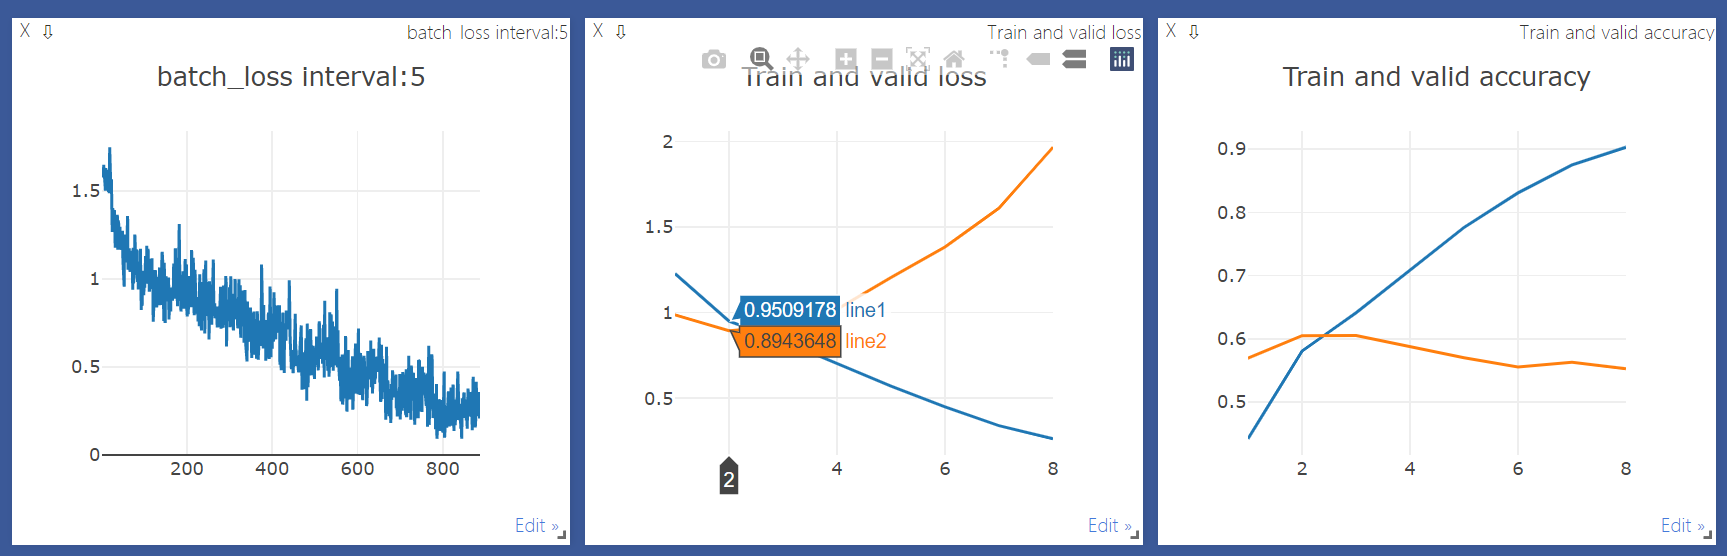

In [11]:
# 固定词向量
config["freeze_embedding"] = True
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': Embedding(42834, 100),
 'freeze_embedding': True,
 'text_hidden_size': 100,
 'text_layers': 1,
 'max_tokens': 512,
 'uniform_bound': 0.1,
 'img_input_size': 2048,
 'img_encoder_layers': 1,
 'attention_nhead': 4,
 'fusion_hidden_size': 200,
 'funsion_layers': 1,
 'dropout': 0.1,
 'output_size': 5,
 'bias_init': 1.0,
 'vocab_size': 42822}

In [12]:
train_set, valid_set, test_set= load_glove_data(config)

In [13]:
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)

In [14]:
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


({'Total': 5620005, 'Trainable': 1336605}, CrossEntropyLoss())

In [15]:
%%time
y_true, y_pred, _loss = predict(model, valid_loader, loss)
evalute(y_true, y_pred), Counter(y_pred)

CPU times: user 4.22 s, sys: 1.96 s, total: 6.18 s
Wall time: 9.81 s


((0.2108352144469526, 0.12154172230526483), Counter({0: 2927, 2: 1478, 1: 25}))

In [16]:
viz = get_Visdom()
_interval = 5
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

Setting up a new session...


In [17]:
%%time
lr = 1e-3
epoches = 20
optimizer = get_regal_optimizer(model, optim.AdamW, lr)
res, model = train_visdom(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer,
                         _interval=_interval)

No 1 epoch:: 554it [01:42,  5.40it/s]


No 1 epoch: train_loss:1.2820619882355457 train_acc:0.4193821413457469 valid_loss:1.0737655988665251 valid_acc:0.5322799097065463


No 2 epoch:: 554it [01:44,  5.32it/s]


No 2 epoch: train_loss:1.069887511444993 train_acc:0.5249259415996614 valid_loss:1.0022896744058578 valid_acc:0.5591422121896162


No 3 epoch:: 554it [01:44,  5.30it/s]


No 3 epoch: train_loss:1.014278505113838 train_acc:0.5479193116095359 valid_loss:0.9575626266191022 valid_acc:0.5679458239277653


No 4 epoch:: 554it [01:43,  5.33it/s]


No 4 epoch: train_loss:0.9743259005594328 train_acc:0.5680067710537452 valid_loss:0.9332690062156919 valid_acc:0.5857787810383747


No 5 epoch:: 554it [01:46,  5.22it/s]


No 5 epoch: train_loss:0.9331908672060074 train_acc:0.5892791649033714 valid_loss:0.9330717450339961 valid_acc:0.59255079006772


No 6 epoch:: 554it [01:45,  5.23it/s]


No 6 epoch: train_loss:0.895521728441567 train_acc:0.6081534772182254 valid_loss:0.9332813524231146 valid_acc:0.5875846501128669


No 7 epoch:: 554it [01:43,  5.35it/s]


No 7 epoch: train_loss:0.849536684773876 train_acc:0.6305543800253914 valid_loss:0.9325382555580569 valid_acc:0.5959367945823928


No 8 epoch:: 554it [01:46,  5.21it/s]


No 8 epoch: train_loss:0.8083595155509307 train_acc:0.6497390323035689 valid_loss:0.9548496744164495 valid_acc:0.590744920993228


No 9 epoch:: 554it [01:44,  5.29it/s]


No 9 epoch: train_loss:0.75180964714752 train_acc:0.6785442234447736 valid_loss:0.9694030147642906 valid_acc:0.5882618510158013


No 10 epoch:: 554it [01:44,  5.28it/s]


No 10 epoch: train_loss:0.696328856898289 train_acc:0.7043870785724362 valid_loss:1.0082260517987924 valid_acc:0.5844243792325057


No 11 epoch:: 554it [01:44,  5.31it/s]


No 11 epoch: train_loss:0.6133854952109417 train_acc:0.7472139935110735 valid_loss:1.0981854831661113 valid_acc:0.5803611738148984


No 12 epoch:: 554it [01:45,  5.24it/s]


No 12 epoch: train_loss:0.5246303021882582 train_acc:0.7875017632952461 valid_loss:1.1770765933710619 valid_acc:0.5758465011286682
CPU times: user 16min 24s, sys: 4min 43s, total: 21min 7s
Wall time: 22min 55s


In [18]:
res

{'max_acc': 0.5959367945823928,
 'max_acc_epoch': 7,
 'max_train_acc': 0.6305543800253914,
 'max_acc_train_loss': 0.849536684773876,
 'max_acc_valid_loss': 0.9325382555580569,
 'last_acc': 0.5758465011286682,
 'last_train_acc': 0.7875017632952461,
 'last_epoch': 12,
 'last_train_loss': 0.5246303021882582,
 'last_valid_loss': 1.1770765933710619}

In [19]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/torch1.6.0/lib/python3.7/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.5930022573363432, 0.5950895485375133), 0.9249954052757194)

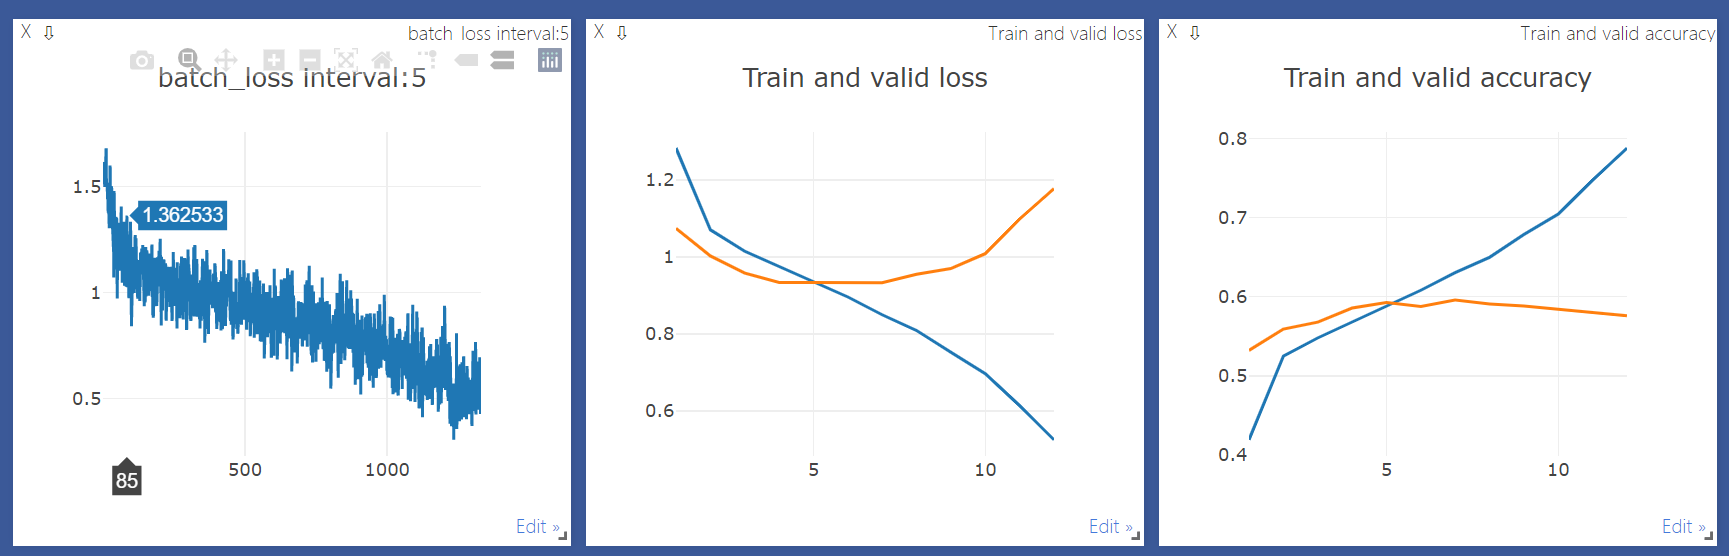